In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import norm
%matplotlib inline


## Generating diferrent samples of 5 distributions with diferent sizes

The distributions are as follow:
 * Chisquare
 * Normal
 * Binomial
 * Poisson
 * Pareto

In [2]:
distributions = ['chisquare','normal','binomial','poisson','pareto']

Each of the distributions, is randomly produced using the same mean ($ \mu = 100 $) and with different sample sizes ($n [10,2000] $) 

In [3]:
np.random.seed(2)
populationMean = 100
sampleSizes = np.linspace(10, 2000, num=100).astype(int)
print 'Samples:',sampleSizes
print 'Amount of samples:',len(sampleSizes) 

Samples: [  10   30   50   70   90  110  130  150  170  190  211  231  251  271  291
  311  331  351  371  391  412  432  452  472  492  512  532  552  572  592
  613  633  653  673  693  713  733  753  773  793  814  834  854  874  894
  914  934  954  974  994 1015 1035 1055 1075 1095 1115 1135 1155 1175 1195
 1216 1236 1256 1276 1296 1316 1336 1356 1376 1396 1417 1437 1457 1477 1497
 1517 1537 1557 1577 1597 1618 1638 1658 1678 1698 1718 1738 1758 1778 1798
 1819 1839 1859 1879 1899 1919 1939 1959 1979 2000]
Amount of samples: 100


In [4]:
md = {}

#chisq
md['chisquare'] = []
chisqMean = populationMean

for i in range(len(sampleSizes)):
    md['chisquare'].append(np.random.chisquare(chisqMean, size = sampleSizes[i]))

#normal    
md['normal'] = []
normalMean = populationMean

for i in range(len(sampleSizes)):
    md['normal'].append(np.random.normal(loc=normalMean, scale=1.0, size=sampleSizes[i]))

#binomial
md['binomial'] = []
p = 0.5
n = populationMean / p

for i in range(len(sampleSizes)):
    md['binomial'].append(np.random.binomial(n, p, size = sampleSizes[i]))

#poisson
md['poisson'] = []
poissonMean = populationMean

for i in range(len(sampleSizes)):
    md['poisson'].append(np.random.poisson(poissonMean, size = sampleSizes[i]))

#pareto
md['pareto'] = []
a = 2.# shape 
m = populationMean * (a-1) / a #scale

for i in range(len(sampleSizes)):
    md['pareto'].append((np.random.pareto(a, size =  sampleSizes[i]) + 1) * m)


For each distribution, a bar plot shows the the value count for a subset of the samples, increasing in size. For every distribution, with the exception of *Pareto*, as $n$ grows in size, the distirbution resembles more and more to a gaussian bell curve.  

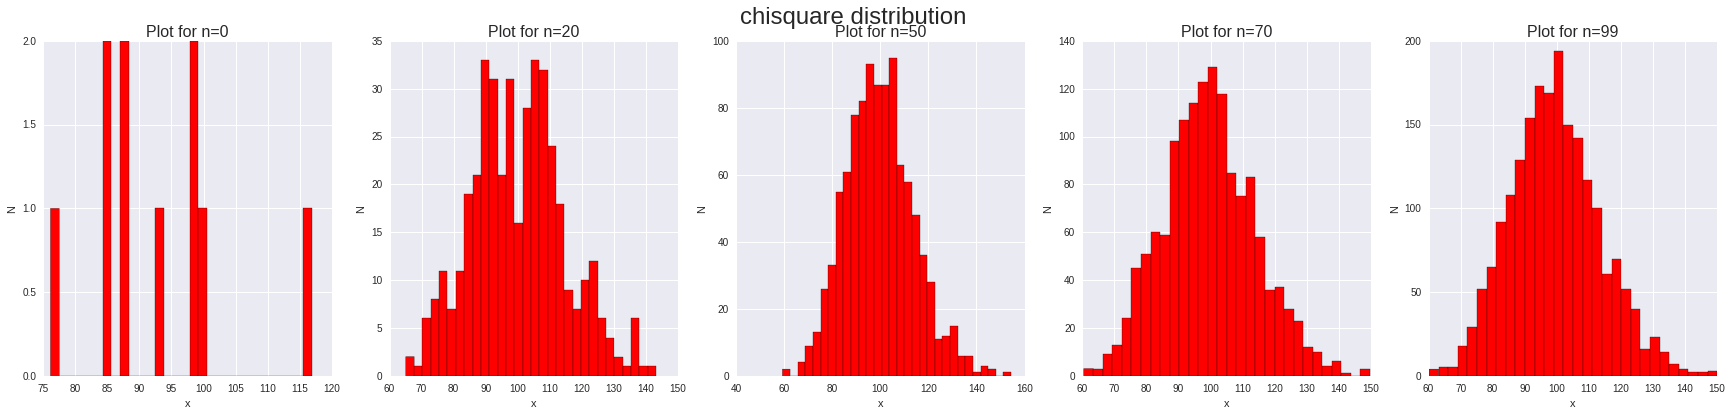

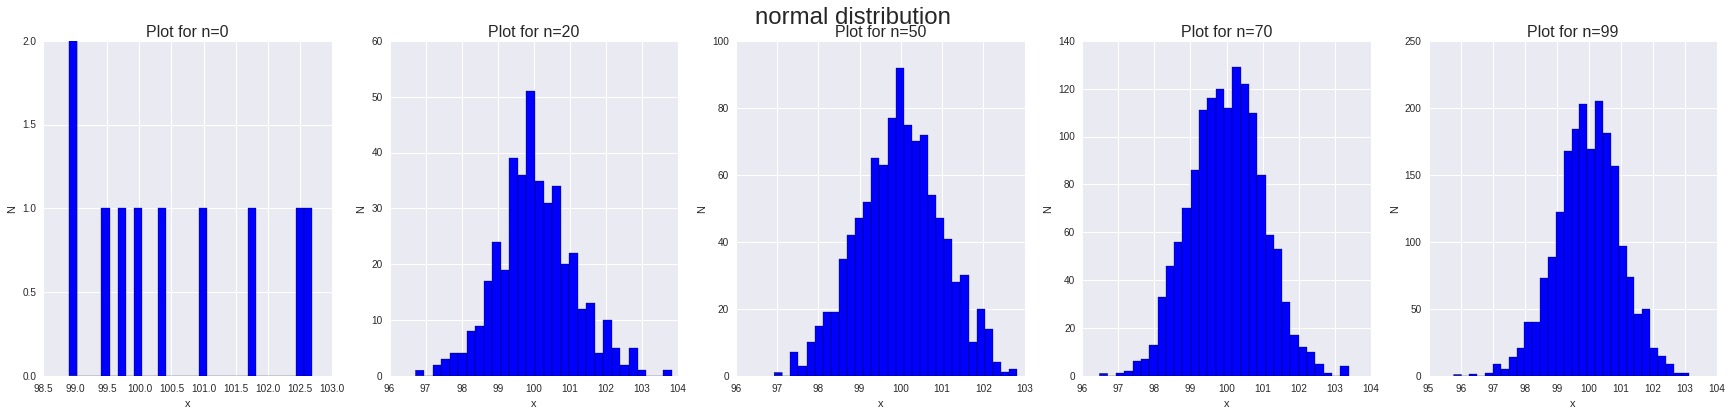

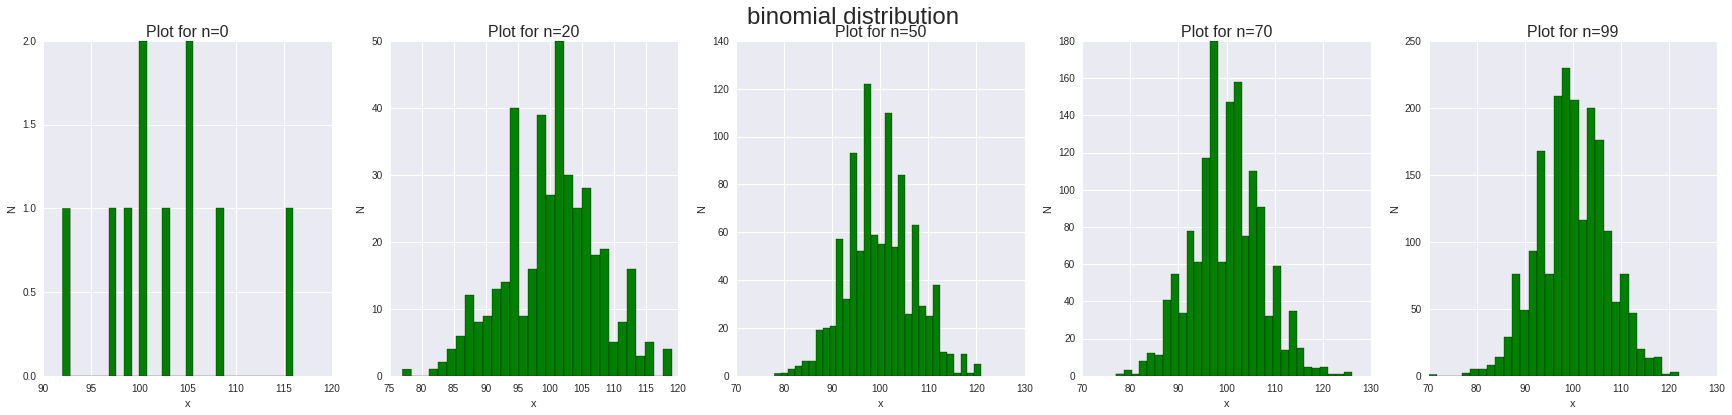

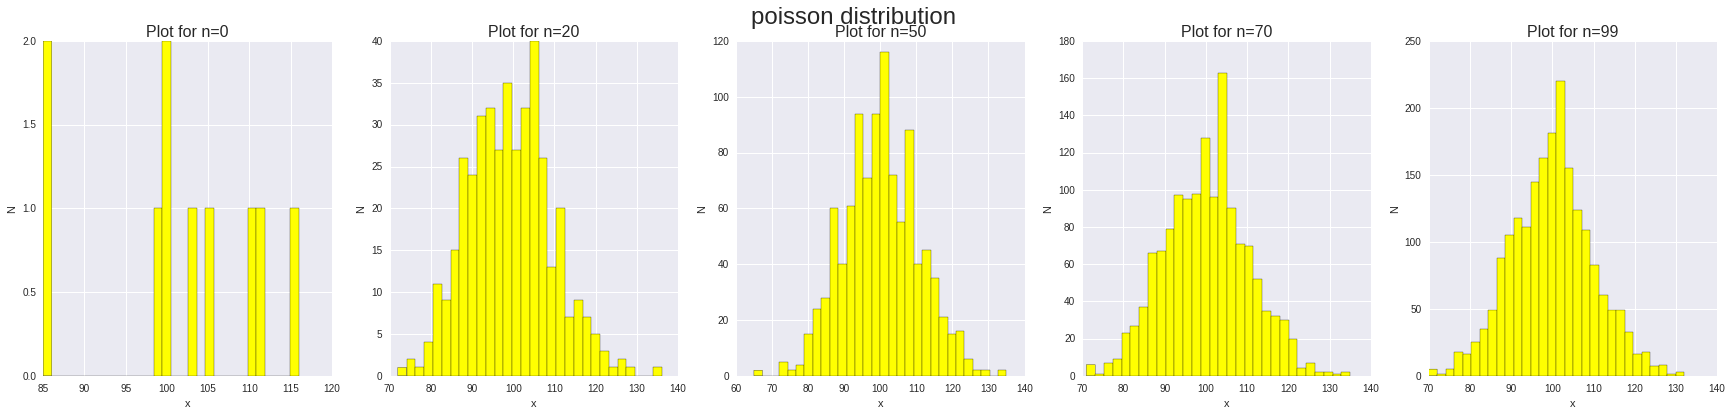

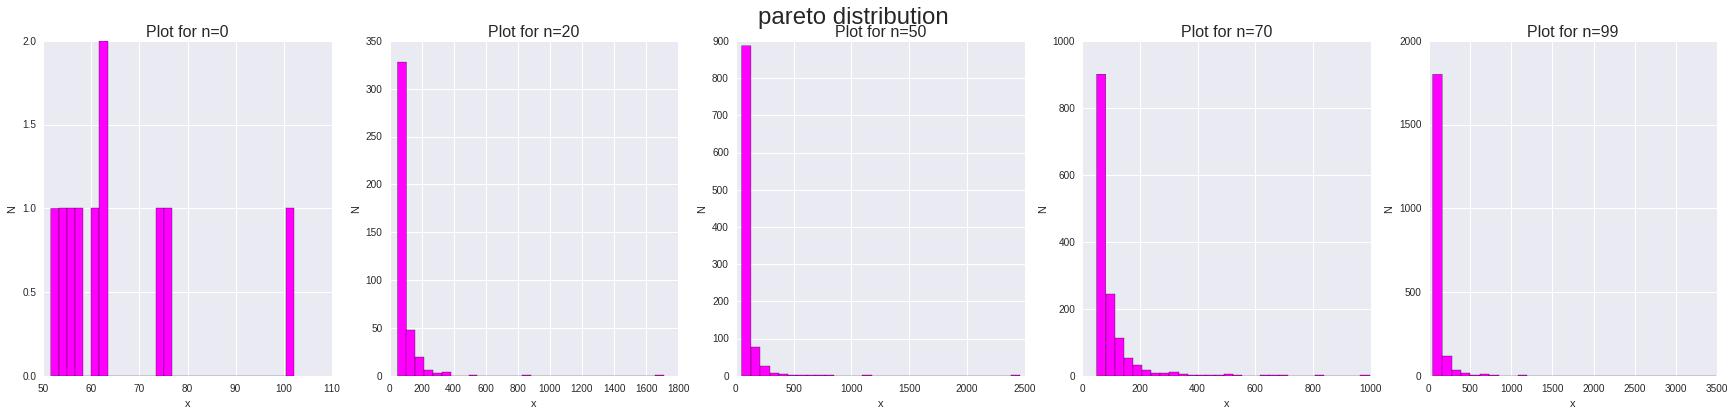

In [5]:
samplesSubset = [0,0,20,50,70,99]
colors = ['red','blue','green','yellow','magenta']
colorId = 0 
for dist in distributions:
    fig = plt.figure(figsize=(30,6))
    fig.suptitle( dist + ' distribution', fontsize=24)
    color = colors[colorId]
    
    for i in range(1,6):
        plt.subplot(1, 5, i) # nrows, mcols, plot_number
        plt.hist(md[dist][samplesSubset[i]], bins=30,color=color)
        plt.title('Plot for n=%d' % (samplesSubset[i]), fontsize=16)
        plt.xlabel('x')
        plt.ylabel('N')
        
    
    colorId += 1




## Figure 1
Histograms for selected samples sizes for each of the five chosen distributions. As the sample size grows, the sample distirbution resembles more and more to a gaussian bell curve. 

Next, for each sample, we plot the sample mean against the sample size N, to see how, as the sample size grows, the sample mean converge to the population mean. This is shown by the triangular shape of the scatter plot. As the value of $ n $ increases, the mean (and also the standar deviations) fluctuates in an increasing narrowly way towards one value: the population parameter.

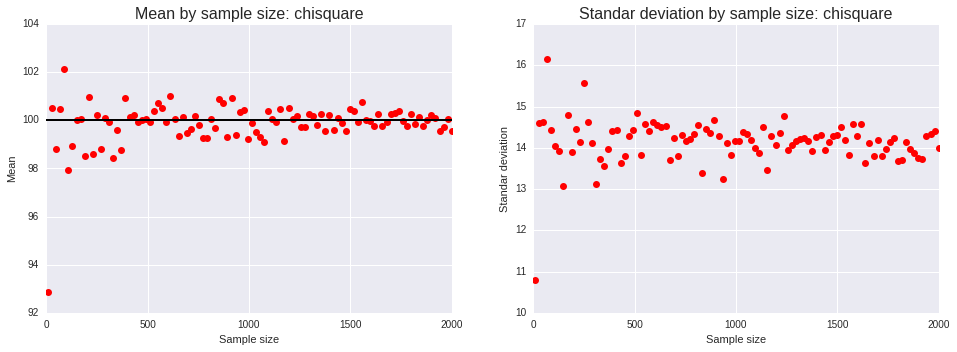

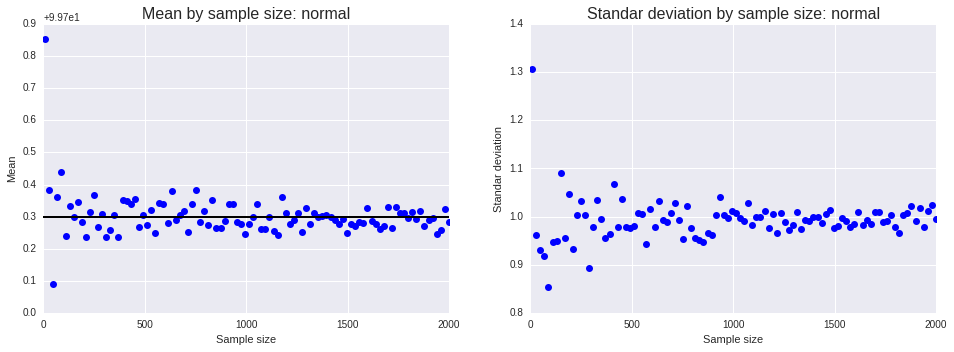

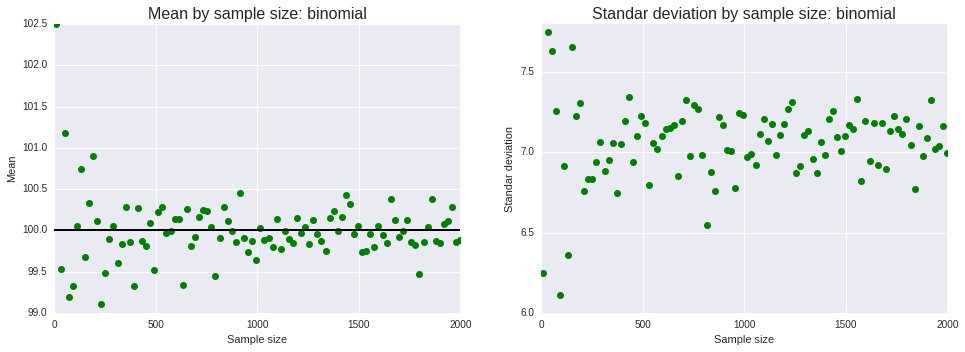

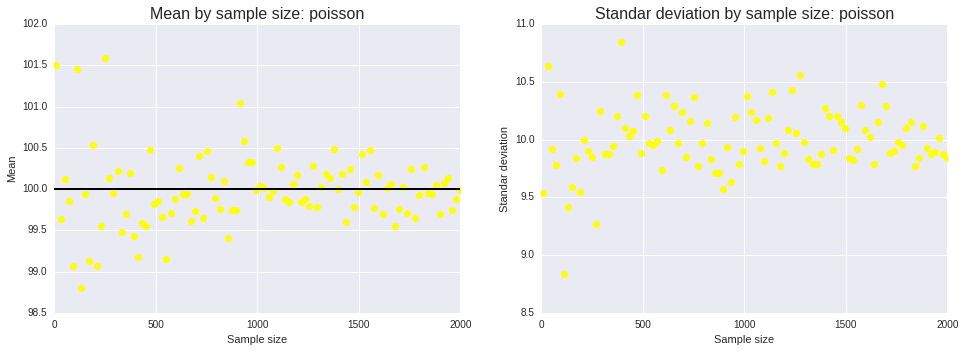

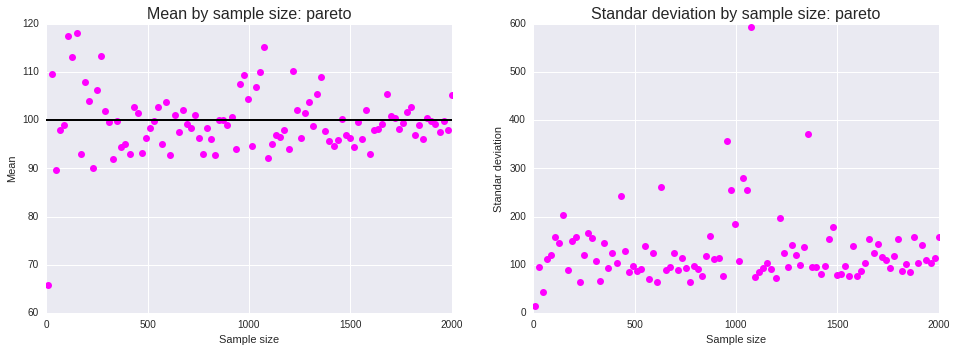

In [6]:
for dist in distributions:
    md[(dist + 'Mean')] = []
    md[(dist + 'Std')] = []
    for sample in md[dist]:
        md[(dist + 'Mean')].append(sample.mean())
        md[(dist + 'Std')].append(sample.std())



for i in range(5):
    plotId = 1
    fig = plt.figure(figsize=(16,30))

    #Mean
    plt.subplot(5,2,plotId)
    plt.plot(sampleSizes,md[(distributions[i] + 'Mean')],'o',color=colors[i],label = distributions[i])
    plt.plot([0, 2000], [100, 100], 'k-', lw=2)
    plt.title('Mean by sample size: '+ distributions[i], fontsize=16)
    plt.xlabel('Sample size')
    plt.ylabel('Mean')

    #Std
    plt.subplot(5,2,plotId+1)
    plt.plot(sampleSizes,md[(distributions[i] + 'Std')],'o',color=colors[i],label = distributions[i] )
    plt.title('Standar deviation by sample size: '+ distributions[i], fontsize=16)
    plt.xlabel('Sample size')
    plt.ylabel('Standar deviation')
    plotId += 2
    
    
    
 

## Figure 2:
Means and standar deviations for each of the five chosen distributions.

Last, we plot the mean of the different samples, to see how they are approximately normally distributed, regardless of the underlying distribution. Histograms and Kernel Density plots are used, with the normal  

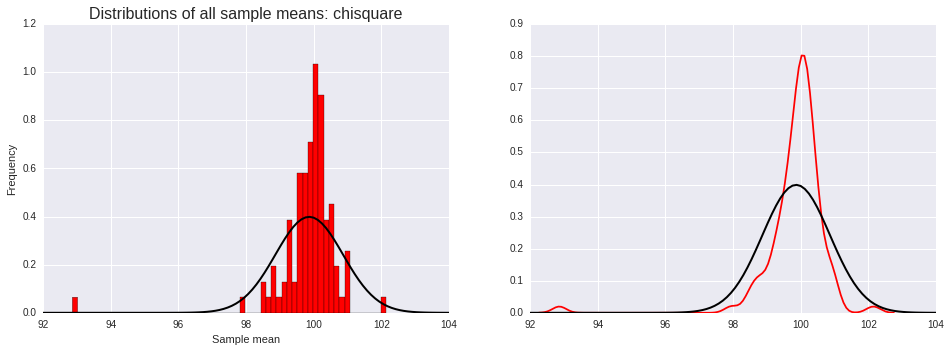

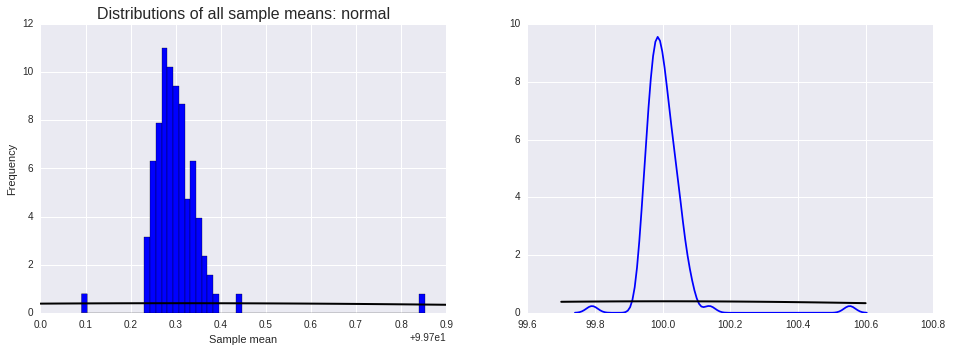

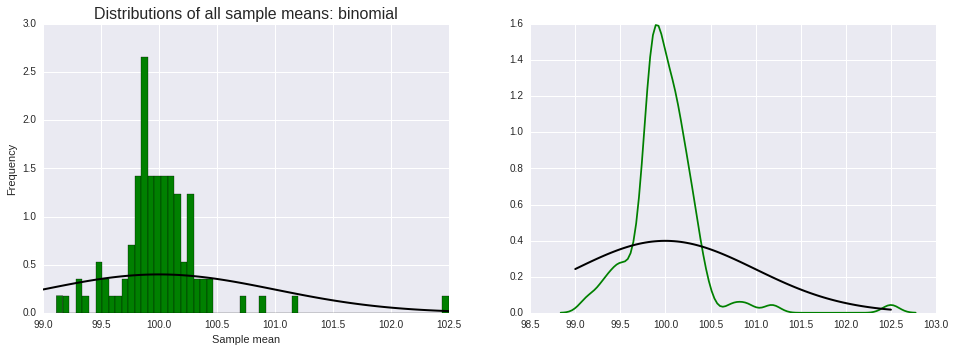

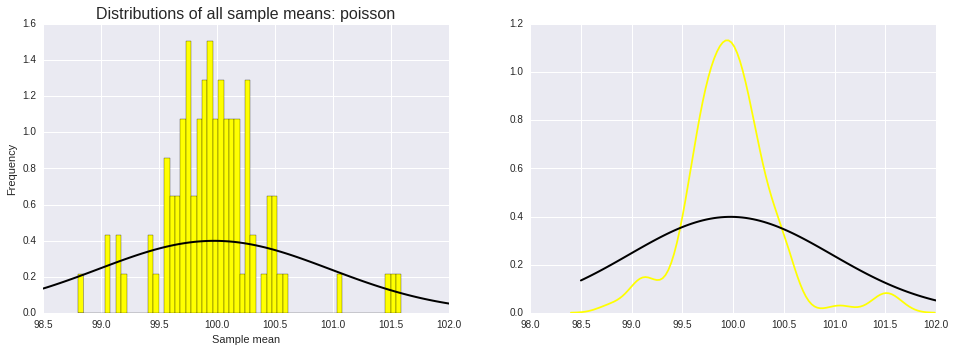

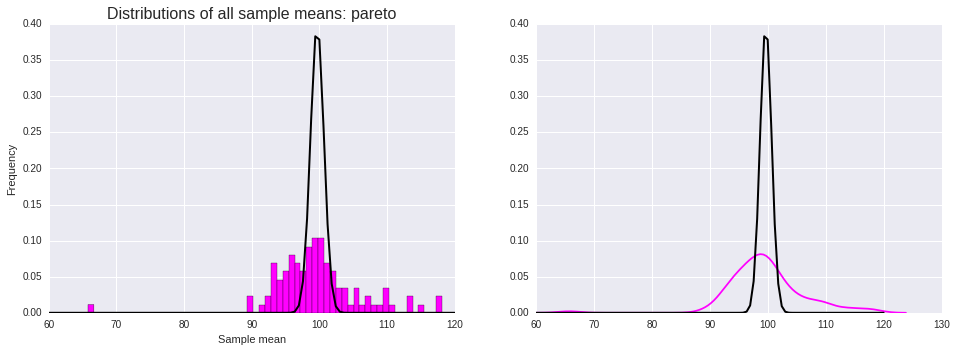

In [10]:

for i in range(5):
    plotId = 1
    fig = plt.figure(figsize=(16,30))

    #Mean
    plt.subplot(5,2,plotId)
    plt.hist(md[(distributions[i] + 'Mean')],normed=True,bins=60,color=colors[i])
    plt.title('Distributions of all sample means: '+ distributions[i], fontsize=16)
    plt.xlabel('Sample mean')
    plt.ylabel('Frequency')
    
    mu, std = norm.fit(md[(distributions[i] + 'Mean')])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, 1)
    plt.plot(x,p, 'k', linewidth=2)

    #Std
    plt.subplot(5,2,plotId+1)
    seaborn.kdeplot(np.array(md[(distributions[i] + 'Mean')]),color=colors[i])
    plt.plot(x,p, 'k', linewidth=2)
    plotId += 2
